<a href="https://colab.research.google.com/github/Isaac-Gathere/DATA-SCIENCE/blob/main/Third_Income_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np



In [2]:
# read the CSV file into a Pandas dataframe
df = pd.read_csv(r'/content/Third-Income Data.csv')

In [3]:
# convert the 'Months' column to a datetime object
df['Months'] = pd.to_datetime(df['Months'], format='%b-%y')


In [4]:
# define the independent variables (COVID-related measures)
X = df[['Loans', 'Investment Securities', 'Other Interest Income', 'Deposits', 'Borrowed Funds',
        'Asset Management and Brokerage', 'Capital Markets and Advisory', 'Card and Cash Management',
        'Lending and Deposit Services', 'Residential and commercial mortgage', 'Other Non-interest income',
        'Recapture of credit losses']]

In [5]:
# check for missing values in X
print(pd.isna(X).sum())

Loans                                  1
Investment Securities                  1
Other Interest Income                  1
Deposits                               1
Borrowed Funds                         1
Asset Management and Brokerage         1
Capital Markets and Advisory           1
Card and Cash Management               1
Lending and Deposit Services           1
Residential and commercial mortgage    1
Other Non-interest income              1
Recapture of credit losses             1
dtype: int64


In [6]:
print(df.head())


      Months    Loans  Investment Securities  Other Interest Income  Deposits  \
0 2019-01-01   9575.0                 2076.0                  701.0    1189.0   
1 2019-02-01   8348.0                 1635.0                  681.0    1752.0   
2 2019-03-01  11219.0                 1901.0                  893.0    1790.0   
3 2019-04-01   9109.0                 1676.0                  668.0    1720.0   
4 2019-05-01   8408.0                 2115.0                  727.0    1612.0   

   Borrowed Funds  Asset Management and Brokerage  \
0          1219.0                           941.0   
1          1438.0                           730.0   
2          1472.0                           905.0   
3          1416.0                           781.0   
4          1696.0                           609.0   

   Capital Markets and Advisory  Card and Cash Management  \
0                        1049.0                    1639.0   
1                        1041.0                    1457.0   
2          

In [7]:
# create a new column for the year
df['year'] = df['Months'].dt.year

In [8]:
# create dummy variables for lockdowns, stimulus, and vaccines
df['lockdown'] = np.where(df['year'] == 2020, 1, 0)
df['stimulus'] = np.where((df['year'] == 2020) & (df['Months'].dt.quarter == 2), 1, 0)
df['vaccines'] = np.where((df['year'] == 2021) & (df['Months'].dt.quarter == 1), 1, 0)


In [9]:
# Drop any rows with missing values
df.dropna(inplace=True)

In [10]:
# perform linear regression with OLS
X = df[['lockdown', 'stimulus', 'vaccines']]
y = df['Gross income from continuing operations']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# print regression summary
print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Gross income from continuing operations   R-squared:                       0.552
Model:                                                 OLS   Adj. R-squared:                  0.521
Method:                                      Least Squares   F-statistic:                     18.06
Date:                                     Wed, 10 May 2023   Prob (F-statistic):           8.75e-08
Time:                                             07:56:36   Log-Likelihood:                -426.09
No. Observations:                                       48   AIC:                             860.2
Df Residuals:                                           44   BIC:                             867.7
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                                         


#### The above regression results show the output of running an OLS regression on the cleaned data. The model predicts the Gross income from continuing operations using the three independent variables - lockdown, stimulus, and vaccines.

#### The coefficients of the model indicate the effect of each variable on the dependent variable when the other variables are held constant.

#### The intercept (const) has a coefficient of 6743.6364, which means that when all the independent variables are zero, the Gross income from continuing operations will be 6743.6364.

##### The coefficient for stimulus is 57.2222,
#### which means that a one-unit increase in stimulus results in a slight increase of 57.2222 in the Gross income from continuing operations when the other variables are held constant.
#### the corresponding p-value is greater than the significance level of 0.05.

#### The R-squared value of the model is 0.552, which means that 55.2% of the variation in the Gross income from continuing operations is explained by the independent variables

In [ ]:
# print(df.head())

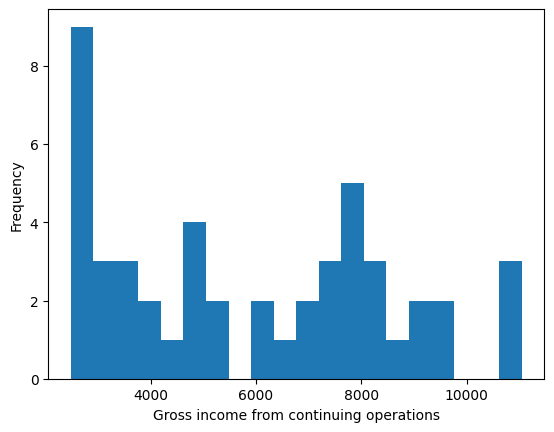

In [11]:
import matplotlib.pyplot as plt

# plot the distribution of the dependent variable
plt.hist(df['Gross income from continuing operations'], bins=20)
plt.xlabel('Gross income from continuing operations')
plt.ylabel('Frequency')
plt.show()


#### The highly occuring gross income from continuing operations ranges below 4000

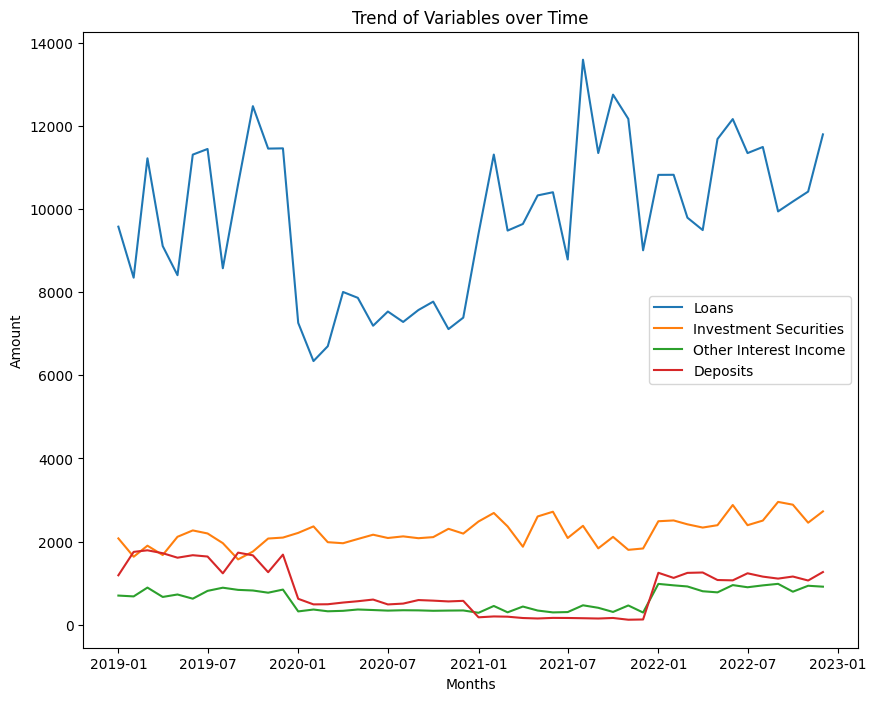

In [12]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Loans'], label='Loans')
plt.plot(df['Months'], df['Investment Securities'], label='Investment Securities')
plt.plot(df['Months'], df['Other Interest Income'], label='Other Interest Income')
plt.plot(df['Months'], df['Deposits'], label='Deposits')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


#### The x-axis shows the time (months) and the y-axis shows the amount of each variable

### From the chart the trend increased in Loans from 2019 to 2023

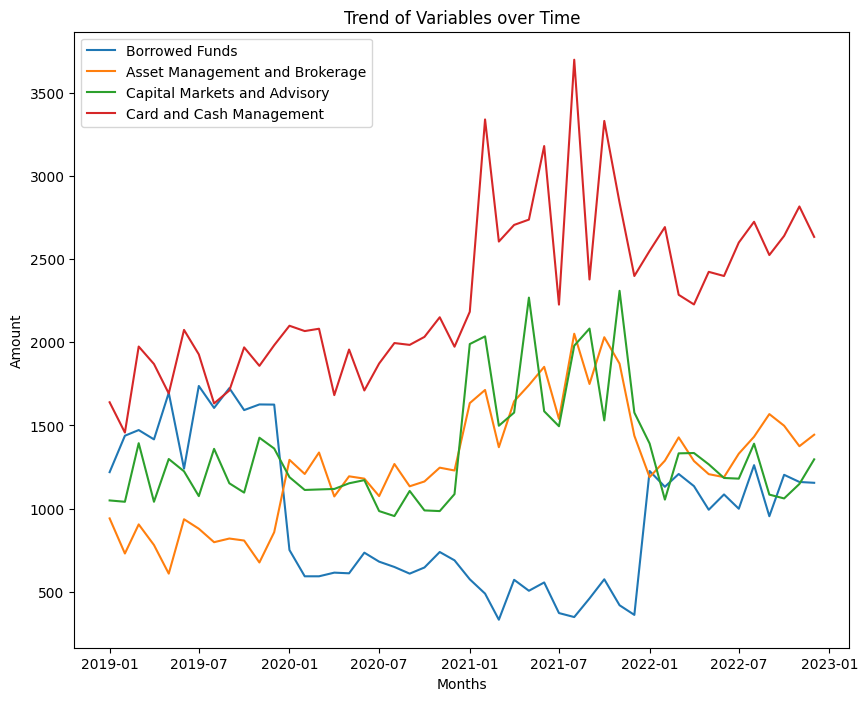

In [13]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Borrowed Funds'], label='Borrowed Funds')
plt.plot(df['Months'], df['Asset Management and Brokerage'], label='Asset Management and Brokerage')
plt.plot(df['Months'], df['Capital Markets and Advisory'], label='Capital Markets and Advisory')
plt.plot(df['Months'], df['Card and Cash Management'], label='Card and Cash Management')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


### The other highest trend was in cash and card management

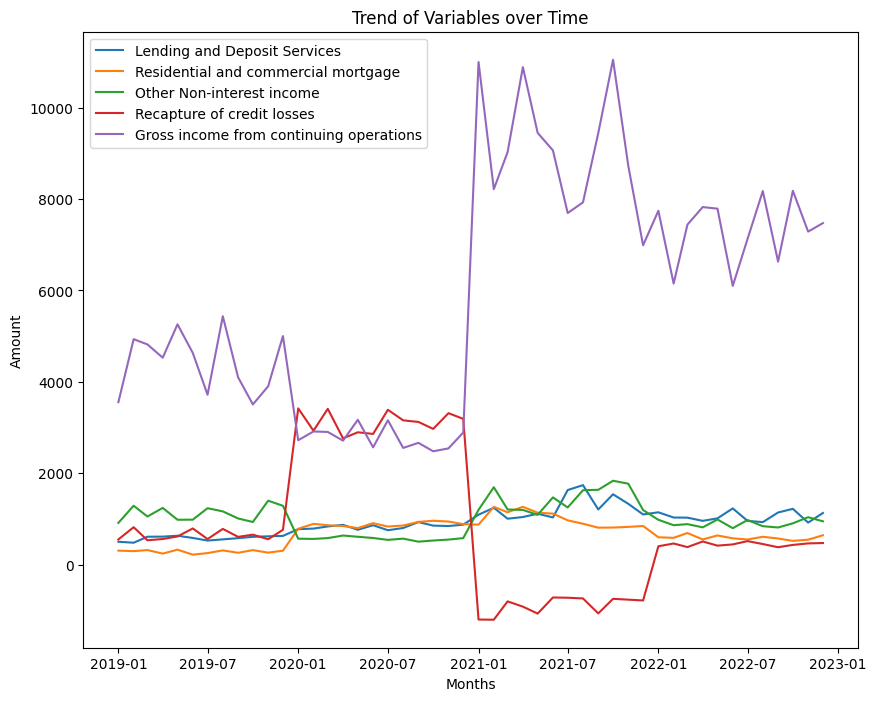

In [14]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Lending and Deposit Services'], label='Lending and Deposit Services')
plt.plot(df['Months'], df['Residential and commercial mortgage'], label='Residential and commercial mortgage')
plt.plot(df['Months'], df['Other Non-interest income'], label='Other Non-interest income')
plt.plot(df['Months'], df['Recapture of credit losses'], label='Recapture of credit losses')
plt.plot(df['Months'], df['Gross income from continuing operations'], label='Gross income from continuing operations')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


### Th Gross income from continuing Operation Increased highly from 2021 to 2022

In [17]:
loans_by_year = df.groupby('year')['Loans'].sum()
print(loans_by_year)


year
2019.0    123969.0
2020.0     88018.0
2021.0    128219.0
2022.0    129947.0
Name: Loans, dtype: float64


In [18]:
highest_loans_year = loans_by_year.idxmax()
print("The year with the highest loans is", int(highest_loans_year))


The year with the highest loans is 2022


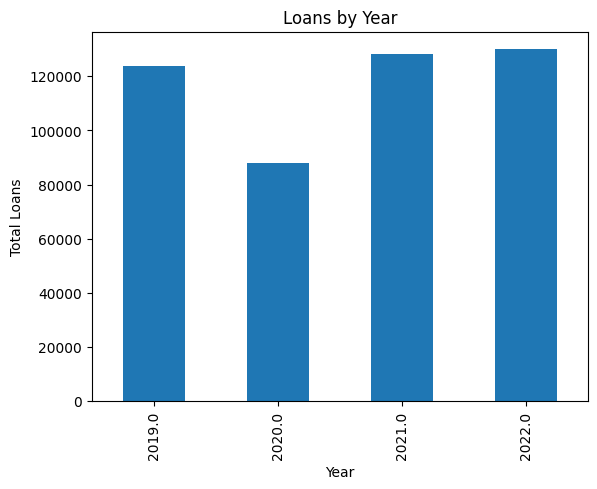

In [19]:
loans_by_year.plot(kind='bar', xlabel='Year', ylabel='Total Loans', title='Loans by Year')
# plot the total loans by year
loans_by_year.plot(kind='bar', xlabel='Year', ylabel='Total Loans', title='Loans by Year')

# show the plot
plt.show()

In [20]:
# create a subset of the data with just the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

# split the data into the dependent variable (Loans) and independent variables
X = numerical_data.drop(['Loans'], axis=1)
y = numerical_data['Loans']

# add a constant to the independent variables for the regression
X = sm.add_constant(X)

# fit the OLS model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Loans   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     9.656
Date:                Wed, 10 May 2023   Prob (F-statistic):           6.19e-08
Time:                        08:02:10   Log-Likelihood:                -383.57
No. Observations:                  48   AIC:                             803.1
Df Residuals:                      30   BIC:                             836.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

#### This is the output of a linear regression model, which is a statistical technique used to analyze the relationship between a dependent variable (in this case, "Loans") and one or more independent variables (listed in the table)

In [21]:
# create a list of all variable names except for the first (index) and last (total) columns
variable_names = list(df.columns)[1:-1]

# create an empty dictionary to store the results
max_years = {}

# loop through each variable and find the year with the highest value
for var_name in variable_names:
    max_year = df[df[var_name] == df[var_name].max()]['year'].values[0]
    max_years[var_name] = max_year

# print the results
for var_name, max_year in max_years.items():
    print(f"The year with the highest value for {var_name} is {max_year}")


The year with the highest value for Loans is 2021.0
The year with the highest value for Investment Securities is 2022.0
The year with the highest value for Other Interest Income is 2022.0
The year with the highest value for Deposits is 2019.0
The year with the highest value for Borrowed Funds is 2019.0
The year with the highest value for Asset Management and Brokerage is 2021.0
The year with the highest value for Capital Markets and Advisory is 2021.0
The year with the highest value for Card and Cash Management is 2021.0
The year with the highest value for Lending and Deposit Services is 2021.0
The year with the highest value for Residential and commercial mortgage is 2021.0
The year with the highest value for Other Non-interest income is 2021.0
The year with the highest value for Recapture of credit losses is 2020.0
The year with the highest value for Gross income from continuing operations is 2021.0
The year with the highest value for Basic earnings per share from continuing operatio

In [23]:
# Calculate total profits for each year
df['Total Profits'] = df['Gross income from continuing operations'] - df['Other Non-interest income']
profits_by_year = df.groupby('year')['Total Profits'].sum()

# Find the year with the maximum profits
max_profit_year = profits_by_year.idxmax()
max_profit = profits_by_year[max_profit_year]
print(f"The year with the highest profits is {max_profit_year} with a total profit of ${max_profit:,.2f}")


The year with the highest profits is 2021.0 with a total profit of $92,227.00
